In [2]:
%reload_ext autoreload
%autoreload 2

import os

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

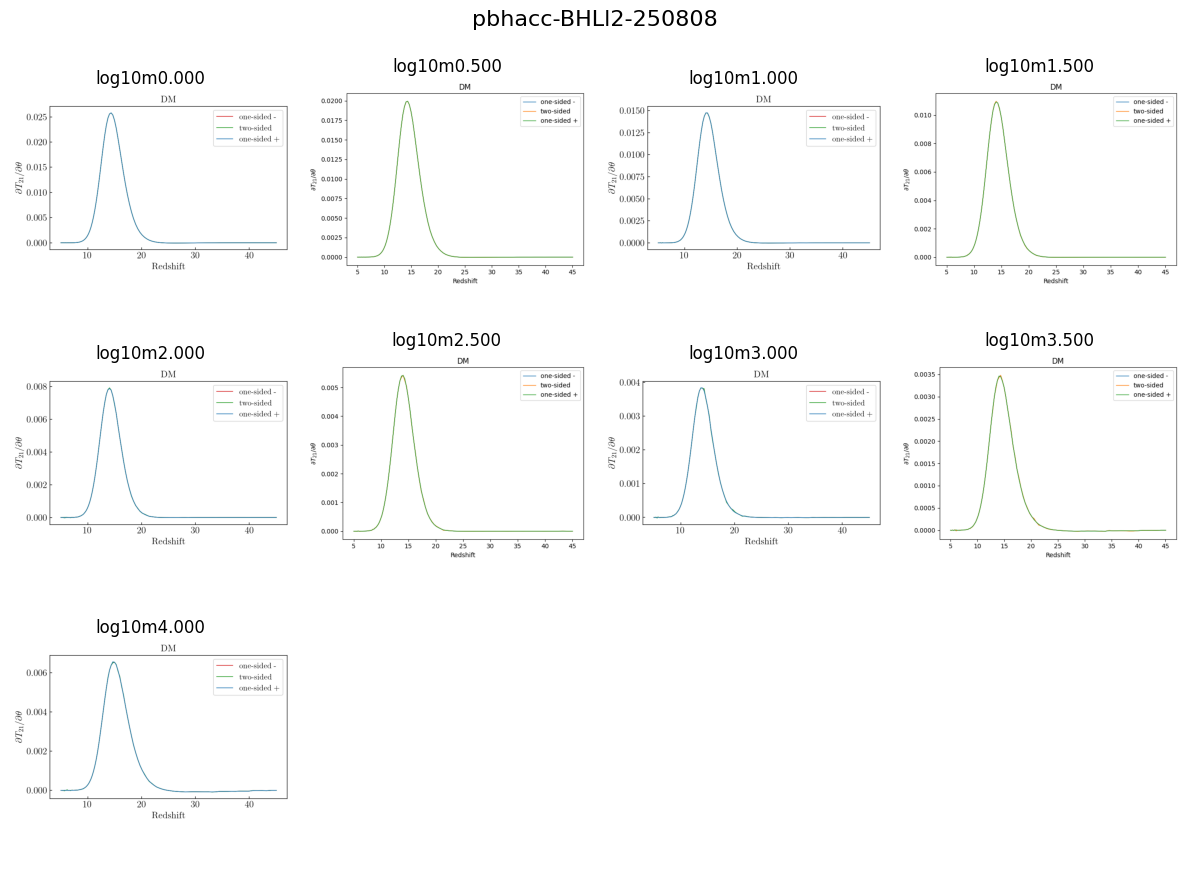

In [8]:
# Path to the root directory containing subfolders
run_name = 'pbhacc-BHLl2-250808'
root_dir = f"/n/holystore01/LABS/iaifi_lab/Users/yitians/dm21cm/outputs/active/{run_name}"

# Collect all matching PNGs
png_paths = []
for dirpath, _, filenames in os.walk(root_dir):
    if "GS_deriv_CDM_DM.png" in filenames:
        png_paths.append(os.path.join(dirpath, "GS_deriv_CDM_DM.png"))
png_paths.sort()

# Set up grid size (square-ish)
n = len(png_paths)
cols = int(n**0.5) + 1
rows = (n + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(3*cols, 3*rows))
axes = axes.flatten()

for ax, path in zip(axes, png_paths):
    img = mpimg.imread(path)
    ax.imshow(img)
    ax.set_title(os.path.basename(os.path.dirname(path)))
    ax.axis("off")

# Hide any unused axes
for ax in axes[len(png_paths):]:
    ax.axis("off")

fig.suptitle(run_name, fontsize=16)
fig.tight_layout()
fig.savefig(f"fisher_derivatives/{run_name}.png", dpi=300)